In [1]:
import numpy as np
import pandas as pd
import gc

datasetPath = ''

trainID = pd.read_csv(datasetPath+'train_identity.csv', encoding='utf-8')
trainID.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [2]:
((trainID.isna().sum()/trainID.shape[0])*100).sort_values(ascending=False)

id_24            96.708798
id_25            96.441868
id_07            96.425922
id_08            96.425922
id_21            96.423149
id_26            96.420375
id_23            96.416215
id_27            96.416215
id_22            96.416215
id_18            68.722137
id_03            54.016071
id_04            54.016071
id_33            49.187079
id_09            48.052110
id_10            48.052110
id_30            46.222432
id_32            46.207872
id_34            46.056034
id_14            44.503685
DeviceInfo       17.726179
id_13            11.726165
id_16            10.325654
id_06             5.108401
id_05             5.108401
id_20             3.447200
id_19             3.407681
id_17             3.372321
id_31             2.739318
DeviceType        2.373243
id_02             2.330257
id_28             2.256765
id_29             2.256765
id_11             2.256765
id_15             2.251912
id_35             2.251912
id_36             2.251912
id_37             2.251912
i

Some columns have 96% NaN values !

<h3>Train Transaction dataset:</h3>

In [3]:
trainTR = pd.read_csv(datasetPath+'train_transaction.csv', encoding='utf-8')
trainTR.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
((trainTR.isna().sum()/trainTR.shape[0])*100).sort_values(ascending=False)

dist2            93.628374
D7               93.409930
D13              89.509263
D14              89.469469
D12              89.041047
                   ...    
C1                0.000000
C2                0.000000
C14               0.000000
isFraud           0.000000
TransactionID     0.000000
Length: 394, dtype: float64

In [5]:
(trainTR['TransactionDT'].max() - trainTR['TransactionDT'].min())/(60*60*24*30)

6.066640046296296

The data is made from the last 6 months

In [6]:
tab = 'V202'
print("Percent of NaN:", (trainTR[tab].isna().sum()/trainTR[tab].shape[0])*100)
print(trainTR[tab][trainTR[tab].notna()])
del tab

Percent of NaN: 76.35536966166559
4           0.000000
8           0.000000
10        166.215393
11          0.000000
16          0.000000
             ...    
590521    451.078796
590526      0.000000
590529      0.000000
590531      0.000000
590534      0.000000
Name: V202, Length: 139631, dtype: float64


Quite a strange data, all the VS data are (according to vesta): "engineered rich features, including ranking, counting, and other entity relations."

In [7]:
print(trainTR['isFraud'].value_counts(normalize=False))
print(trainTR['isFraud'].value_counts(normalize=True))

0    569877
1     20663
Name: isFraud, dtype: int64
0    0.96501
1    0.03499
Name: isFraud, dtype: float64


Only 3.5% (20663) are fraudulous transactions

**What we know so far:**

Not useful:
* TransactionID
* TransactionDT
* isFraud

Transaction Table - Categorical Features:
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

Identity Table - Categorical Features:
* Categorical Features:
* DeviceType
* DeviceInfo
* id_12 - id_38

<h2>2. Preprocess the data:</h2>

* Left join the dataframes
* Drop columns with more than 90% NaN
* Convert the NaN
* Separate fraudulent transactions from normal
* Encode categorical features
* Normalize input vectors
* Make a validation set from 10% of normal transactions

In [8]:
to_replace = ['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149'
              , 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322'
              , 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_03'
              , 'id_04', 'id_07', 'id_08', 'id_09', 'id_10']

def make_hour_feature(f):
    #Creates an hour of the day feature, encoded as 0-23.  
    hours = f / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

def preprocessData(dataTR, dataID, training=True):
    global to_replace
    train = pd.merge(dataTR, dataID, on='TransactionID', how='left')
    del dataTR; del dataID
    
    train['hour'] = make_hour_feature(train['TransactionDT'])

    cat_features = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain'
                    , 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo'
                    , 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24'
                    , 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37'
                    , 'id_38']

    exclude = ['TransactionID', 'TransactionDT', 'isFraud']

    if(training):
        # binary categorical if more than 80% NAs (only numerical)
        col_na = train.isna().sum()
        to_replace = col_na[(col_na / train.shape[0]) > 0.8].index
        to_replace = [f for f in to_replace if f not in cat_features]
        print(to_replace)
        
    num_features = [f for f in train.columns if (f not in to_replace) & (f not in cat_features) & (f not in exclude)]

    train[cat_features].astype(str)
    train[to_replace].astype(str)
    train[num_features].astype(np.float)
    
    # fill numeric NAs with median
    for tab in num_features:
        train.loc[train[tab].isnull(), tab] = train[tab].median()

    # fill categorical NAs with "m" for missing and "nm" for not missing
    for tab in cat_features:
        train.loc[train[tab].isnull(), tab] = "m"
    for tab in to_replace:
        train.loc[train[tab].notnull(), tab] = "nm"
        train.loc[train[tab].isnull(), tab] = "m"
    
    if(training): train.drop(columns=['TransactionID', 'TransactionDT'], axis=1, inplace=True)
    else: train.drop(columns=['TransactionDT'], axis=1, inplace=True)
        
    cat_features = train.select_dtypes(exclude=np.number).columns
    
    return train, num_features, cat_features

In [9]:
train, num_features, cat_features = preprocessData(trainTR, trainID)
del trainTR; del trainID
gc.collect()

['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_03', 'id_04', 'id_07', 'id_08', 'id_09', 'id_10']


0

In [10]:
#Separate fraud from normal transactions

fraudData = train.loc[train['isFraud'] == 1, :]
train = train.loc[train['isFraud'] == 0, :]
print(len(fraudData))
print(len(train))
print("train NaN:", train.isna().sum().sum())
print("fraud NaN:", fraudData.isna().sum().sum())

20663
569877
train NaN: 0
fraud NaN: 0


In [11]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train[num_features+list(cat_features)], train['isFraud'], test_size=0.1)
fraudVal = fraudData['isFraud']
fraudData = fraudData[num_features+list(cat_features)]
print(len(train_X), 'train examples')
print(len(val_X), 'validation examples')

del train
gc.collect()

512889 train examples
56988 validation examples


0

In [12]:
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def makeTransformer():
    # Numerical columns will be scaled by StandardScaler
    scaler = StandardScaler()

    # Categorical values will be encoded using Binary Encoder
    bie = BinaryEncoder()

    column_trans = ColumnTransformer(
        [('scaler',scaler, num_features),
        ('bie', bie, cat_features)], remainder='passthrough', n_jobs=-1)
    
    return column_trans

column_trans = makeTransformer()

train_X_transformed = column_trans.fit_transform(train_X)
val_X_transformed = column_trans.transform(val_X)

del num_features; del cat_features
del val_X; del train_X
gc.collect()

print(train_X_transformed.shape, val_X_transformed.shape)

(512889, 679) (56988, 679)


<h2>3. Create and train the model</h2>

The fun begins here (in my opinion), we will create an autoencoder and compute the mean squared error of the reconstructed data.

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

def makeModel():
    inputs = layers.Input(train_X_transformed.shape[1])
    x = layers.Dense(544, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(inputs)
    x = layers.Dense(352, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)
    x = layers.Dense(160, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)
    x = layers.Dense(96, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)
    x = layers.Dense(160, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)
    x = layers.Dense(352, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)
    x = layers.Dense(544, activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)
    output = layers.Dense(train_X_transformed.shape[1], activation="relu", activity_regularizer=tf.keras.regularizers.l1(1e-5))(x)

    model = Model(inputs, output, name="Autoencoder")
    return model

model = makeModel()
model.summary()

Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 679)]             0         
_________________________________________________________________
dense (Dense)                (None, 544)               369920    
_________________________________________________________________
dense_1 (Dense)              (None, 352)               191840    
_________________________________________________________________
dense_2 (Dense)              (None, 160)               56480     
_________________________________________________________________
dense_3 (Dense)              (None, 96)                15456     
_________________________________________________________________
dense_4 (Dense)              (None, 160)               15520     
_________________________________________________________________
dense_5 (Dense)              (None, 352)               

In [14]:
model.compile(
    optimizer = 'adam',
    loss='mean_squared_error')

history = model.fit(
    x=train_X_transformed,
    y=train_X_transformed,
    validation_data=(val_X_transformed, val_X_transformed),
    batch_size=1024,
    epochs=50)

Epoch 1/50
501/501 [==============================] - 21s 35ms/step - loss: 0.3271 - val_loss: 0.2742
Epoch 2/50
501/501 [==============================] - 14s 28ms/step - loss: 0.2756 - val_loss: 0.2608
Epoch 3/50
501/501 [==============================] - 18s 36ms/step - loss: 0.2733 - val_loss: 0.2583
Epoch 4/50
501/501 [==============================] - 20s 41ms/step - loss: 0.2620 - val_loss: 0.2412
Epoch 5/50
501/501 [==============================] - 14s 28ms/step - loss: 0.2488 - val_loss: 0.2386
Epoch 6/50
501/501 [==============================] - 15s 29ms/step - loss: 0.2518 - val_loss: 0.2367
Epoch 7/50
501/501 [==============================] - 15s 30ms/step - loss: 0.2431 - val_loss: 0.6533
Epoch 8/50
501/501 [==============================] - 14s 27ms/step - loss: 0.2825 - val_loss: 0.2412
Epoch 9/50
501/501 [==============================] - 14s 27ms/step - loss: 0.2387 - val_loss: 0.2279
Epoch 10/50
501/501 [==============================] - 14s 27ms/step - loss: 0.232

In [15]:
model.save_weights("autoencoder_weights.h5")

In [16]:
model.load_weights("autoencoder_weights.h5")

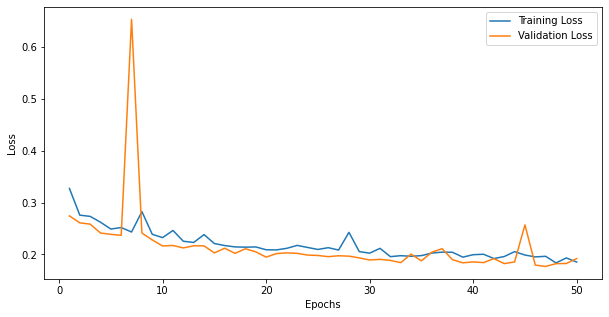

In [17]:
import matplotlib.pyplot as plt

def plotHistory():
    lossV = history.history['loss']
    epochs = range(1, len(lossV)+1)

    val_lossV = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, lossV, label='Training Loss')
    plt.plot(epochs, val_lossV, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
plotHistory()

<h2>4. Determine the threshold for fraud data</h2>

To finish we need to determine the threshold (for fraud data) of the reconstruction error (mean squared error)

In [19]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.mse(reconstructions, x_train_scaled)
    print(reconstruction_errors)
    threshold = np.mean(reconstruction_errors.numpy())
    return threshold

gc.collect()

threshold = find_threshold(model, val_X_transformed)
print(f"Threshold: {threshold}")

tf.Tensor([0.04235995 0.08396806 0.18531188 ... 0.04840187 0.21672199 0.02379264], shape=(56988,), dtype=float64)
Threshold: 0.18841933732137245


<h2>5. Test the model !</h2>

To conclude we will test the model on fraud data and on the test dataset

In [21]:
from sklearn.metrics import accuracy_score

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    predictions = tf.keras.losses.mse(predictions, x_test_scaled)
    # 1 = anomaly, 0 = normal
    anomaly_mask = pd.Series(predictions) > threshold
    predictions = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
    return predictions

gc.collect()

fraudData_transformed = column_trans.transform(fraudData)
predictions = get_predictions(model, fraudData_transformed, threshold)
print('fraud acc:', accuracy_score(predictions, fraudVal))

predictions = get_predictions(model, val_X_transformed, threshold)
print('val acc:', accuracy_score(predictions, val_y))

fraud acc: 0.49997580215844745
val acc: 0.8548115392714256


And now we are able to make predictions on transactions !

Though, 50% of frauds will be detected and 15% of normal transaction will be misclassified which is not enough, in order to improve it we'll have to improve the feature engineering part, or change the model.